### LIBRARIES AND DATA IMPORT

In [2]:
# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#Data preprocessing
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE


#Modelling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [3]:
#Import the data
data = pd.read_csv('Student_performance_data _.csv')
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
# Make a copy of the original data
data_original = data.copy()

In [5]:
data.drop('StudentID', axis= 1, inplace=True)

### Basic Eda

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 261.8 KB


-No missingness

In [7]:
data.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

In [8]:
data.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


-Columns to standardize: Age, StudyTimeWeekly, Absences

In [9]:
#Target variable distibution
data['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

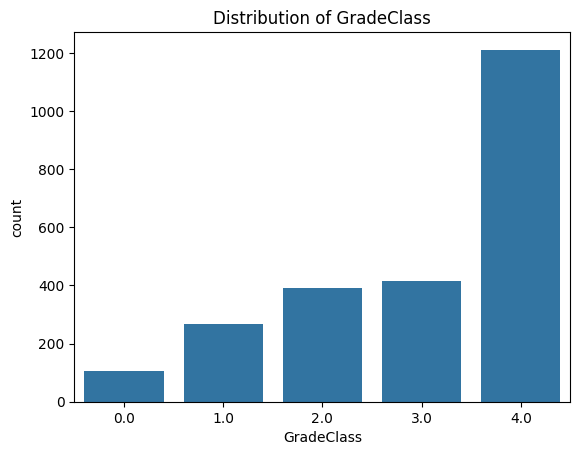

In [10]:
sns.countplot(x='GradeClass', data=data)
plt.title('Distribution of GradeClass')
plt.show()

-class imbalance

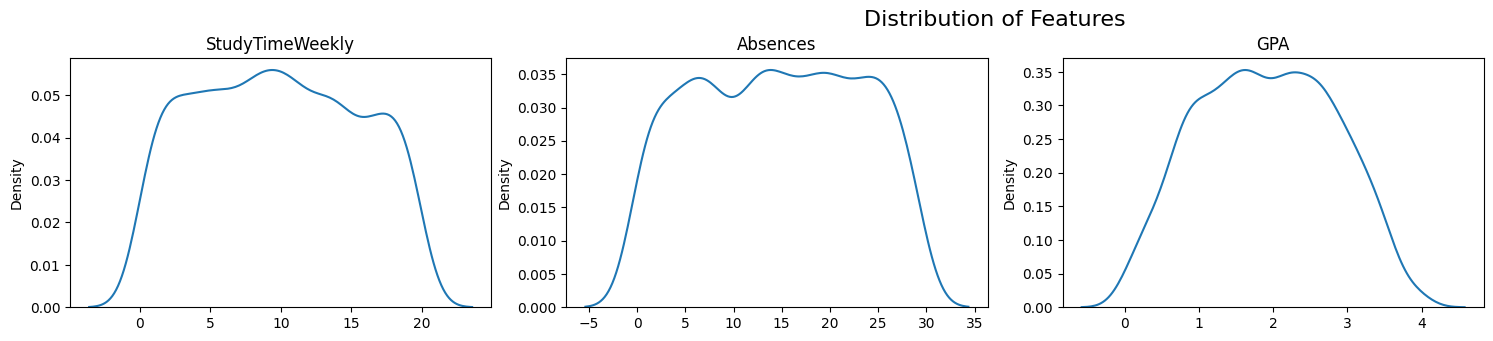

In [11]:
columns = [ 'StudyTimeWeekly', 'Absences', 'GPA']

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 12))
fig.suptitle('Distribution of Features', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each feature
for i, column in enumerate(columns):
    sns.kdeplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

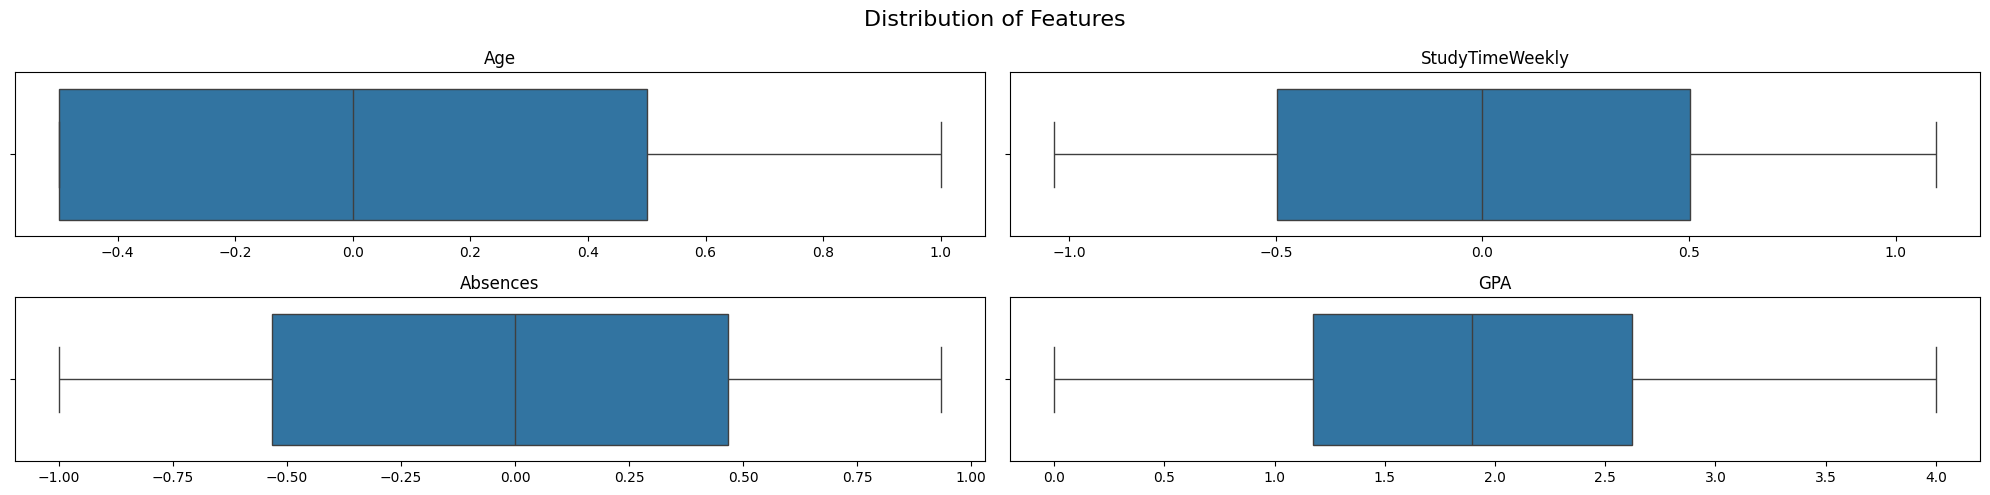

In [43]:
#colmns to visualize using boxplots 
columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

fig, axes = plt.subplots(2, 2, figsize=(20, 5))
fig.suptitle('Distribution of Features', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each feature
for i, column in enumerate(columns):
    sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


-no outliers

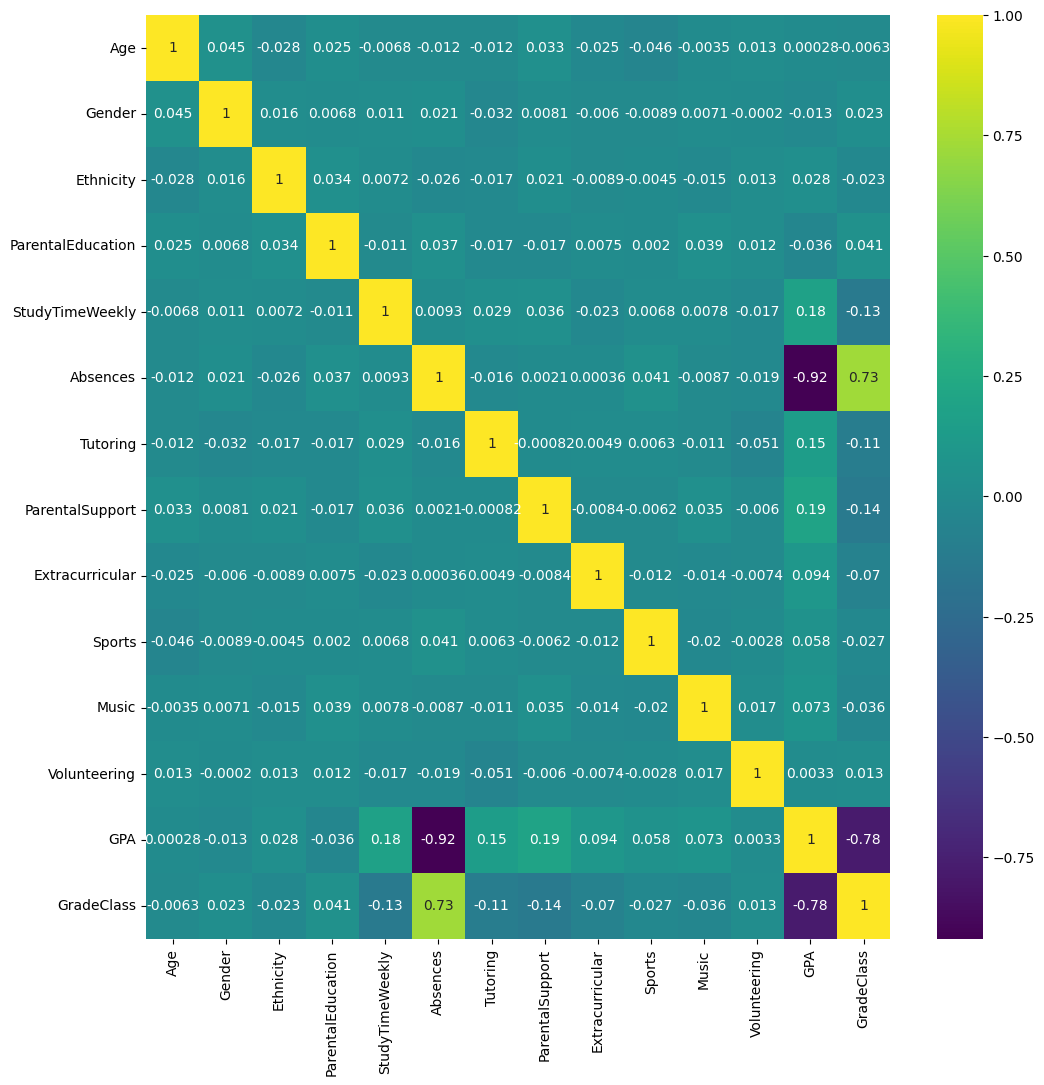

In [44]:
#Correlation Matrix
corr_matrix = data.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.show()

- Generally, there is low multicollinearity among the features. 
- Strong negative correlation (-0.92) between Absences and GPA.

### Data preprocessing

In [12]:
#Scaling
columns_to_scale = ['Age', 'StudyTimeWeekly', 'Absences']

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the selected columns
data[columns_to_scale] = robust_scaler.fit_transform(data[columns_to_scale])

# # Verify the scaling
data[columns_to_scale].describe()


,Age,StudyTimeWeekly,Absences
count,2392.000000,2.392000e+03,2392.000000
mean,0.234323,7.114400e-03,-0.030574
std,0.561899,6.035851e-01,0.564494
min,-0.500000,-1.036195e+00,-1.000000
25%,-0.500000,-4.978238e-01,-0.533333
50%,0.000000,-9.483720e-17,0.000000
75%,0.500000,5.021762e-01,0.466667
max,1.000000,1.096889e+00,0.933333


In [13]:
#Define the features and the target
x = data.drop('GradeClass', axis=1)
y = data['GradeClass']

In [14]:

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
#Apply SMOTE to the training data to address the imbalance
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

### Modelling

In [16]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr_cv_scores = cross_val_score(lr, x_train_res, y_train_res, cv=5, scoring='accuracy')
lr.fit(x_train_res, y_train_res)
lr_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='macro')
lr_recall = recall_score(y_test, lr_pred, average='macro')
lr_f1 = f1_score(y_test, lr_pred, average='macro')



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [17]:
print("Logistic Regression Results:")
print(f"lr_cv_scores: {lr_cv_scores.mean():.4f}")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")

Logistic Regression Results:
lr_cv_scores: 0.5908
Accuracy: 0.5846
Precision: 0.4187
Recall: 0.4057
F1 Score: 0.4093


In [18]:
# Support Vector Machine
svm = SVC(random_state=42)
svm_cv_scores = cross_val_score(svm, x_train_res, y_train_res, cv=5, scoring='accuracy')
svm.fit(x_train_res, y_train_res)
svm.fit(x_train_res, y_train_res)
svm_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_f1 = f1_score(y_test, svm_pred, average='macro')


In [19]:
print("Support Vector Machine Results:")
print(f"svm_cv_scores: {svm_cv_scores.mean():.4f}")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")

Support Vector Machine Results:
svm_cv_scores: 0.8296
Accuracy: 0.7850
Precision: 0.6809
Recall: 0.6691
F1 Score: 0.6673


In [20]:
# Naive Bayes
nb = GaussianNB()
nb_cv_scores = cross_val_score(nb, x_train_res, y_train_res, cv=5, scoring='accuracy')
nb.fit(x_train_res, y_train_res)
nb_pred = nb.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='macro')
nb_recall = recall_score(y_test, nb_pred, average='macro')
nb_f1 = f1_score(y_test, nb_pred, average='macro')

In [21]:
print("Naive Bayes Results:")
print(f"nb_cv_scores: {nb_cv_scores.mean():.4f}")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1 Score: {nb_f1:.4f}")

Naive Bayes Results:
nb_cv_scores: 0.6632
Accuracy: 0.6868
Precision: 0.5252
Recall: 0.5241
F1 Score: 0.5214


In [22]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf, x_train_res, y_train_res, cv=5, scoring='accuracy')
rf.fit(x_train_res, y_train_res)
rf_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

In [23]:
print("Random Forest Results:")
print(f"rf_cv_scores: {rf_cv_scores.mean():.4f}")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print()

Random Forest Results:
rf_cv_scores: 0.9337
Accuracy: 0.9144
Precision: 0.8937
Recall: 0.8501
F1 Score: 0.8677



In [24]:
# Create a DataFrame with all results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest'],
    'Cross Validation Score': [lr_cv_scores.mean(), svm_cv_scores.mean(), nb_cv_scores.mean(), rf_cv_scores.mean()],
    'Accuracy': [lr_accuracy, svm_accuracy, nb_accuracy, rf_accuracy],
    'Precision': [lr_precision, svm_precision, nb_precision, rf_precision],
    'Recall': [lr_recall, svm_recall, nb_recall, rf_recall],
    'F1 Score': [lr_f1, svm_f1, nb_f1, rf_f1]
})

results

,Model,Cross Validation Score,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.590760,0.584551,0.418686,0.405749,0.409313
1,SVM,0.829569,0.784969,0.680926,0.669086,0.667308
2,Naive Bayes,0.663244,0.686848,0.525188,0.524150,0.521431
3,Random Forest,0.933676,0.914405,0.893724,0.850063,0.867739


- Best model : Randomforest

### Hyperparameter tuning

In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_res, y_train_res)
y_pred = rf.predict(x_test)

In [26]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[ 14,   1,   3,   2,   2],
       [  1,  43,   0,   1,   4],
       [  1,   2,  74,   4,   4],
       [  0,   2,   2,  77,   5],
       [  0,   3,   0,   4, 230]], dtype=int64)

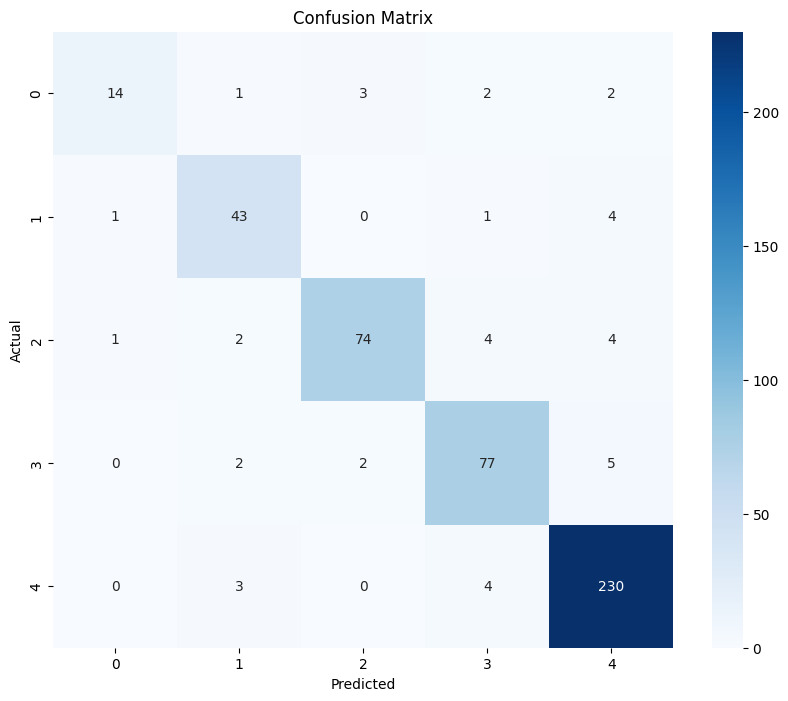

In [27]:
# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [28]:
# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame
report_df

,precision,recall,f1-score,support
0.0,0.875000,0.636364,0.736842,22.000000
1.0,0.843137,0.877551,0.860000,49.000000
2.0,0.936709,0.870588,0.902439,85.000000
3.0,0.875000,0.895349,0.885057,86.000000
4.0,0.938776,0.970464,0.954357,237.000000
accuracy,0.914405,0.914405,0.914405,0.914405
macro avg,0.893724,0.850063,0.867739,479.000000
weighted avg,0.914246,0.914405,0.913059,479.000000


- The model performs best on Class 4, with the highest number of correct predictions.
- Imbalance in the dataset, with Class 4 having significantly higher samples.
- Wrong predictions per class:

        - Class 0: 8
        - Class 1: 6
        - Class 2: 11
        - Class 3: 9
        - Class 4: 7
- Model struggles differentiating classes especially class 3 and 4
 


In [29]:
#Create the param grid
param_grid = {
      #'n_estimators': [30, 70, 100] 
      #'max_features' : ['sqrt', 'log2']
      #'max_depth' : [40, None]
      #'min_samples_split' : [2]
      #'min_samples_leaf' : [1]
      #'bootstrap' : [False]
      'class_weight' : ['balanced', 'balanced_subsample']
      }

In [30]:
# Initialize the GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid ,
    cv=5,  
)
    

In [31]:
# Fit the model
rf_grid_search.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', 'balanced_subsample']})

In [32]:
rf_grid_search.best_params_

{'class_weight': 'balanced'}

In [33]:
rf2 = RandomForestClassifier(random_state=42, class_weight='balanced')

In [34]:
# Train the model with the best parameters
rf2.fit(x_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [35]:
# Predict on the test set
y_pred_best = rf.predict(x_test)

In [36]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_best, average='weighted'))
print("F1_score:", f1_score(y_test, y_pred_best, average='weighted'))

Accuracy: 0.9144050104384134
Precision: 0.9142458759355332
Recall: 0.9144050104384134
F1_score: 0.9130592036154567


In [37]:

# Metrics before tuning
metrics_before = {
    "Model": "Random Forest (Before Tuning)",
    "Accuracy": 0.9144,
    "Precision": 0.8937,
    "Recall": 0.8501,
    "F1 Score": 0.8677
}

# Metrics after tuning
metrics_after = {
    "Model": "Random Forest (After Tuning)",
    "Accuracy": 0.9144,
    "Precision": 0.9142,
    "Recall": 0.9144,
    "F1 Score": 0.9131
}

# Create a DataFrame
df_comparison = pd.DataFrame([metrics_before, metrics_after])

df_comparison


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (Before Tuning),0.9144,0.8937,0.8501,0.8677
1,Random Forest (After Tuning),0.9144,0.9142,0.9144,0.9131


In [38]:
#Confusion matrix
cm2 = confusion_matrix(y_test, y_pred_best)
cm2

array([[ 14,   1,   3,   2,   2],
       [  1,  43,   0,   1,   4],
       [  1,   2,  74,   4,   4],
       [  0,   2,   2,  77,   5],
       [  0,   3,   0,   4, 230]], dtype=int64)

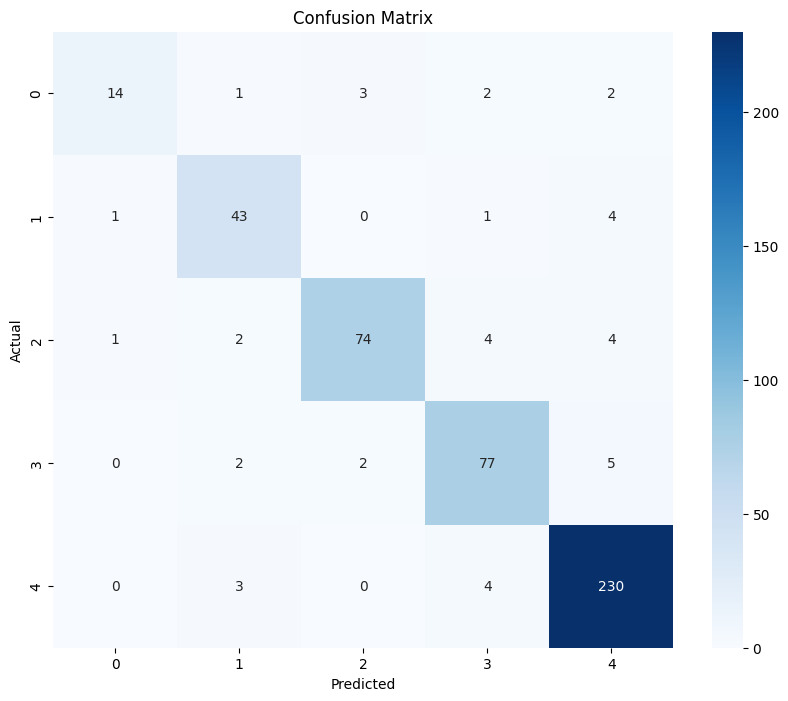

In [39]:
# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Feature importance

In [40]:
#Extract feature importances
feature_importances = rf.feature_importances_

In [41]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.to_string(index=False))

          Feature  Importance
              GPA    0.481222
         Absences    0.208071
  StudyTimeWeekly    0.076347
              Age    0.056685
  ParentalSupport    0.036451
ParentalEducation    0.032786
        Ethnicity    0.031370
           Gender    0.017145
         Tutoring    0.014814
           Sports    0.014772
  Extracurricular    0.013672
            Music    0.009199
     Volunteering    0.007466


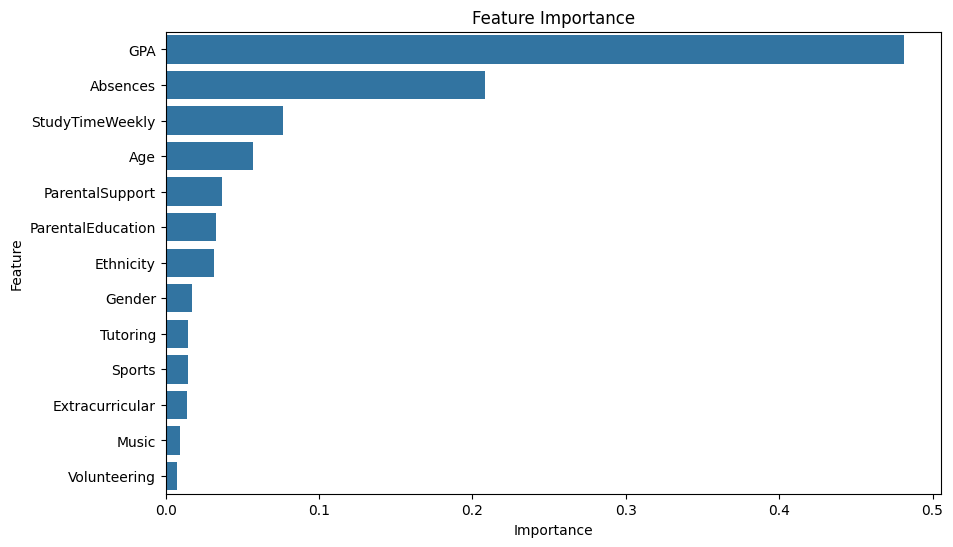

In [42]:
# Visualization of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

- Minimizing absences is crucial. Regular attendance allows students to stay caught up with the coursework, participate in class activities, and benefit from teacher instruction.
- Excessive absences can indicate lack of engagement, discipline, or personal issues that may impact a student's overall performance.
- Develop effective study habits. This may involve techniques like time management, focused studying, and seeking help when needed.
- Demographic factors (age, ethnicity, gender) being less important.   Educational institutions may aim to evaluate students based on their academic merit and potential, rather than demographic characteristics